# Lending Club Case Study - Prashant Ramdas Patil

Reading the data set . Number of columns removed initially on visual inspection. List of columns removed provied in the end.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("loan.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Removing outliers

Checking outliers for loan amount 

{'whiskers': [<matplotlib.lines.Line2D at 0x1231069d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12311f070>,
 'boxes': [<matplotlib.lines.Line2D at 0x123106580>],
 'medians': [<matplotlib.lines.Line2D at 0x12311f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x12311fb20>],
 'means': []}

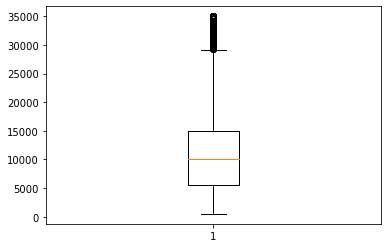

In [4]:
df.head()

plt.boxplot(df.loan_amnt)

Removing outliers for loan amount 

{'whiskers': [<matplotlib.lines.Line2D at 0x1236c7f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1236d16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1236c7be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1236d1df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1236d81c0>],
 'means': []}

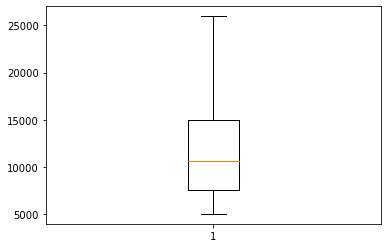

In [7]:
df = df[ (df['loan_amnt'] < 26000) & (df['loan_amnt'] >= 5000) ]

plt.boxplot(df.loan_amnt)

For interest rate analysis. , removing the % character and checking outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x122eb50d0>,
 'caps': [<matplotlib.lines.Line2D at 0x122eb57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122ec5d00>],
 'medians': [<matplotlib.lines.Line2D at 0x122eb5f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x122e832e0>],
 'means': []}

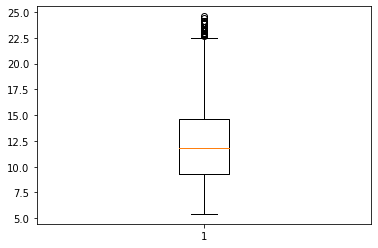

In [12]:

#df['int_rate'] = df['int_rate'].astype('str')

#df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

plt.boxplot(df.int_rate)

Removing outliers for interest rate 

{'whiskers': [<matplotlib.lines.Line2D at 0x122488ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x122478640>,
 'boxes': [<matplotlib.lines.Line2D at 0x122488b50>],
 'medians': [<matplotlib.lines.Line2D at 0x122478d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1239af130>],
 'means': []}

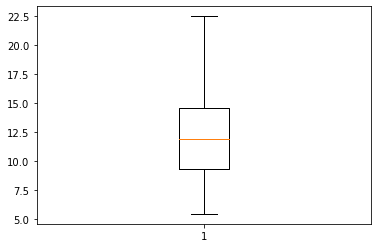

In [13]:
df = df[ (df['int_rate'] < 22.5) ]

plt.boxplot(df.int_rate)

Checking removing outliers for income group

{'whiskers': [<matplotlib.lines.Line2D at 0x12264b5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x12264bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12264b220>],
 'medians': [<matplotlib.lines.Line2D at 0x122652430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1226527c0>],
 'means': []}

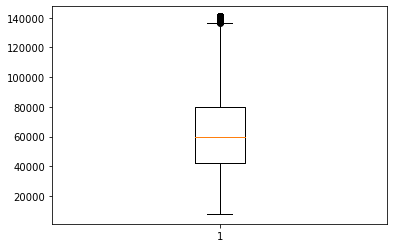

In [14]:
#plt.boxplot(df.annual_inc)

y =  df["annual_inc"].quantile(.95)
#df.describe()
df =df.loc[(df["annual_inc"] <= y)]

plt.boxplot(df.annual_inc)

seperating three. dataframes from analysis -
1. With having fully paid  and charged off customers 
2. With paid customers
3. With Charged off customers

In [15]:
df_notCurrent = df[df['loan_status'] != "Current"]

df_fullypaid = df[df['loan_status'] == "Fully Paid"]

df_default = df[df['loan_status'] == "Charged Off"]

##  Univariate analysis 

Based on address state for fully paid and defaulter customers

<AxesSubplot:>

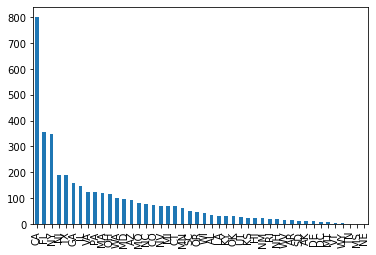

In [112]:
df_default['addr_state'].value_counts().plot.bar()

<AxesSubplot:>

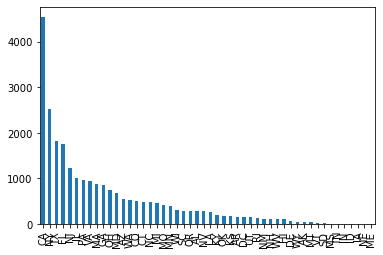

In [74]:
df_fullypaid['addr_state'].value_counts().plot.bar()

<AxesSubplot:ylabel='addr_state'>

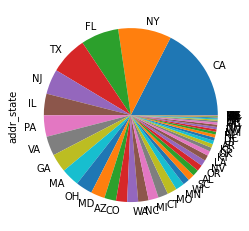

In [114]:
df_fullypaid['addr_state'].value_counts().plot.pie()

<AxesSubplot:ylabel='addr_state'>

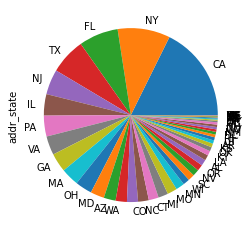

In [119]:
df['addr_state'].value_counts().plot.pie()

Interest rate analysis

In [117]:
df_default.int_rate.describe()

count    3968.000000
mean       13.760718
std         3.540384
min         5.420000
25%        11.360000
50%        13.490000
75%        16.320000
max        22.480000
Name: int_rate, dtype: float64

In [118]:
df_fullypaid.int_rate.describe()

count    22838.000000
mean        11.593462
std          3.520906
min          5.420000
25%          8.590000
50%         11.490000
75%         13.980000
max         22.480000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

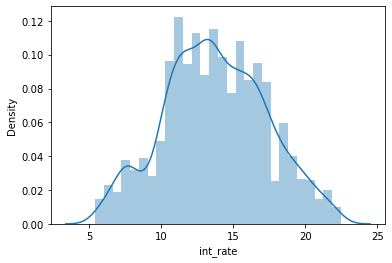

In [160]:
sns.distplot(df_default.int_rate)

/Users/prashantpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

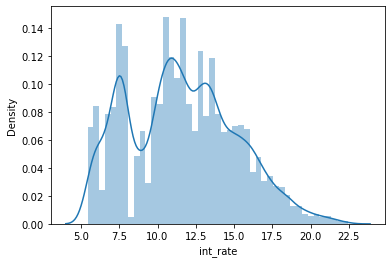

<AxesSubplot:>

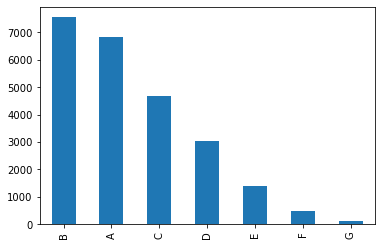

In [16]:
df_fullypaid['grade'].value_counts().plot.bar()

<AxesSubplot:>

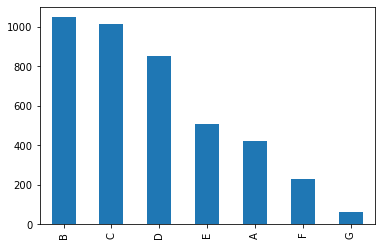

In [31]:
df_default['grade'].value_counts().plot.bar()

<AxesSubplot:>

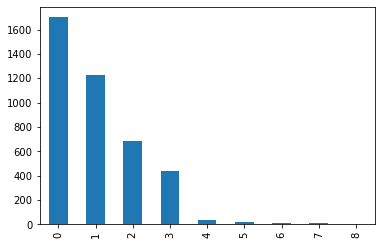

In [30]:
df_default['inq_last_6mths'].value_counts().plot.bar()

<AxesSubplot:>

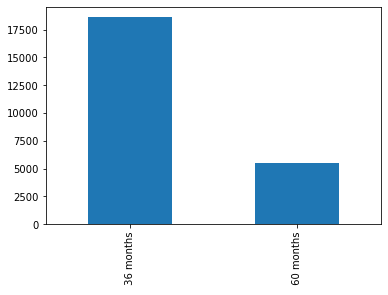

In [37]:
df_fullypaid['term'].value_counts().plot.bar()

<AxesSubplot:>

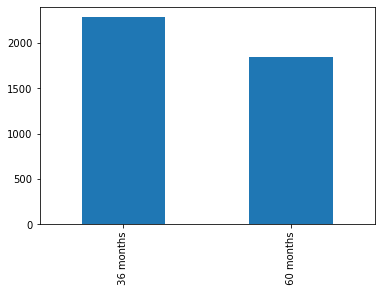

In [38]:
df_default['term'].value_counts().plot.bar()

<AxesSubplot:>

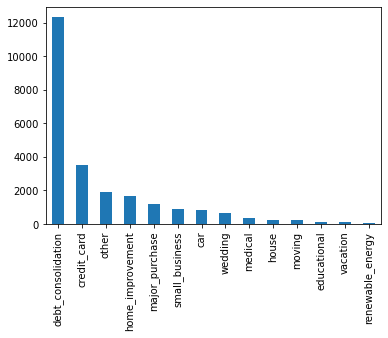

In [21]:
df_fullypaid['purpose'].value_counts().plot.bar()

<AxesSubplot:>

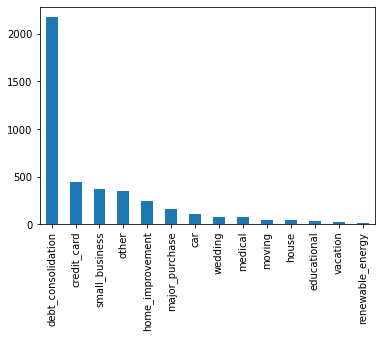

In [44]:
df_default['purpose'].value_counts().plot.bar()

## Bivariate analysis

Annual income comparison with respect to loan amount title

/Users/prashantpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


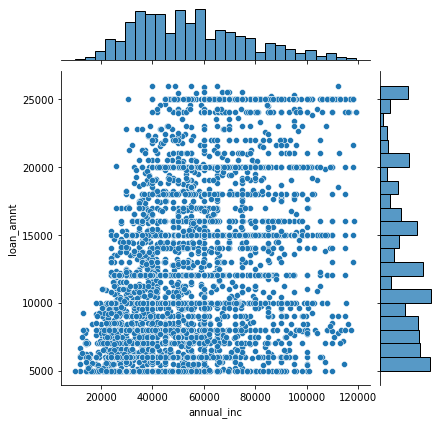

In [179]:
sns.jointplot(df_default.annual_inc,df_default.loan_amnt)

/Users/prashantpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


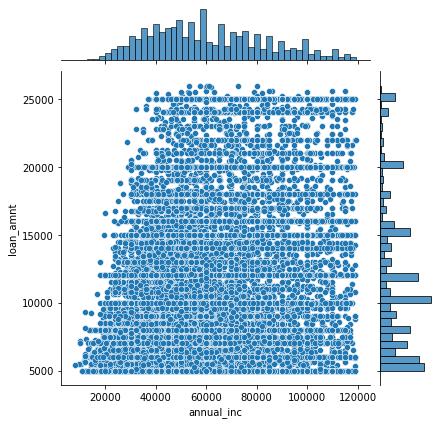

In [193]:
sns.jointplot(df_fullypaid.annual_inc,df_fullypaid.loan_amnt)

/Users/prashantpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


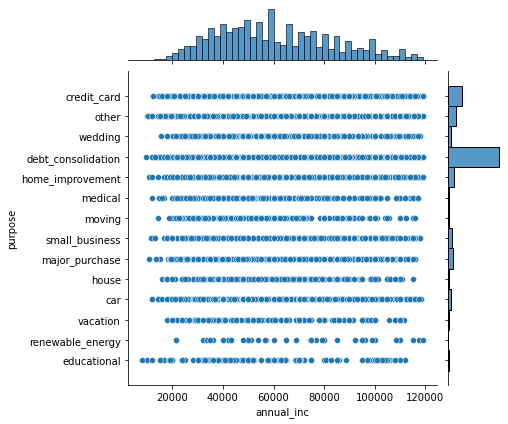

In [215]:
sns.jointplot(df_fullypaid.annual_inc,df_fullypaid.purpose)

/Users/prashantpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


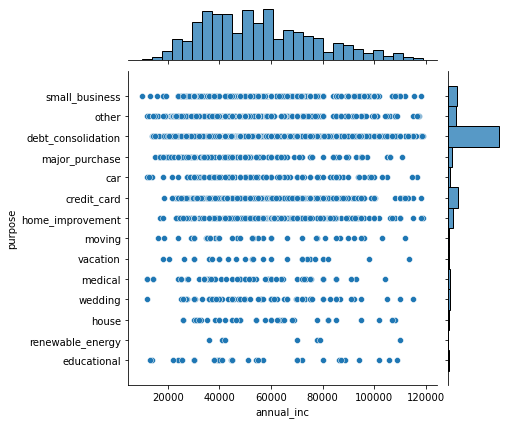

In [216]:
sns.jointplot(df_default.annual_inc,df_default.purpose)